In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import plotly.graph_objects as go
import pandas as pd
import cv2
import matplotlib.image as mpimg

In [118]:
# Read the data of ADA USDT
adausdt = pd.read_csv("data/xrpusdt.csv")

# Check the data
adausdt.head(5)

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,LogReturns
0,1609459200000,0.21953,0.22235,0.21600,0.22162,41811263.2,1609462799999,9.182731e+06,15775,21324444.2,4.683732e+06,0.000000
1,1609462800000,0.22160,0.22695,0.22112,0.22382,50498851.0,1609466399999,1.132976e+07,20059,24266117.0,5.444734e+06,0.009878
2,1609466400000,0.22382,0.22495,0.22300,0.22361,24103267.5,1609469999999,5.396238e+06,11014,12751287.4,2.854956e+06,-0.000939
3,1609470000000,0.22370,0.22901,0.22339,0.22730,36455710.5,1609473599999,8.244463e+06,15609,18391583.1,4.160122e+06,0.016367
4,1609473600000,0.22730,0.25000,0.22640,0.23898,202261688.6,1609477199999,4.875000e+07,85810,108689838.6,2.619103e+07,0.050109


In [119]:
# Check the data shape
adausdt.shape

(33573, 12)

In [120]:
# Print the list of columns
adausdt.columns.tolist()

['Open time',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Close time',
 'Quote asset volume',
 'Number of trades',
 'Taker buy base asset volume',
 'Taker buy quote asset volume',
 'LogReturns']

In [121]:
# Delete unnecessary columns
adausdt_important = adausdt.drop(["Open time", "Close time", "Number of trades", "Taker buy base asset volume", 'Taker buy quote asset volume', "Quote asset volume"], axis = 1)
adausdt_important

,Open,High,Low,Close,Volume,LogReturns
0,0.21953,0.22235,0.21600,0.22162,41811263.2,0.000000
1,0.22160,0.22695,0.22112,0.22382,50498851.0,0.009878
2,0.22382,0.22495,0.22300,0.22361,24103267.5,-0.000939
3,0.22370,0.22901,0.22339,0.22730,36455710.5,0.016367
4,0.22730,0.25000,0.22640,0.23898,202261688.6,0.050109
...,...,...,...,...,...,...
33568,0.50670,0.50880,0.50600,0.50620,4771577.0,-0.001185
33569,0.50620,0.50920,0.50590,0.50860,5780806.0,0.004730
33570,0.50850,0.51070,0.50760,0.51000,3633848.0,0.002749
33571,0.51000,0.51090,0.50820,0.51080,3306474.0,0.001567


In [122]:
# Create a sample image
df_slice = adausdt_important[0: 24]
df_slice.shape

(24, 6)

In [123]:
# Plot a sample image
# Create a data range for the x-axis
df_slice["Date"] = pd.date_range(start = '2023-01-01', periods = 24, freq = 'h')
df_slice

/var/folders/pl/z1lfm5xs7299k23shpwd6ngh0000gp/T/ipykernel_3411/3321465241.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,LogReturns,Date
0,0.21953,0.22235,0.21600,0.22162,41811263.2,0.000000,2023-01-01 00:00:00
1,0.22160,0.22695,0.22112,0.22382,50498851.0,0.009878,2023-01-01 01:00:00
2,0.22382,0.22495,0.22300,0.22361,24103267.5,-0.000939,2023-01-01 02:00:00
3,0.22370,0.22901,0.22339,0.22730,36455710.5,0.016367,2023-01-01 03:00:00
4,0.22730,0.25000,0.22640,0.23898,202261688.6,0.050109,2023-01-01 04:00:00
5,0.23891,0.24187,0.23470,0.23819,73967814.5,-0.003311,2023-01-01 05:00:00
6,0.23819,0.23903,0.23037,0.23428,59163886.6,-0.016552,2023-01-01 06:00:00
7,0.23421,0.23430,0.22564,0.22976,75509666.3,-0.019482,2023-01-01 07:00:00
8,0.22971,0.23195,0.22577,0.22874,50737349.1,-0.004449,2023-01-01 08:00:00
9,0.22878,0.23781,0.22851,0.23259,60071806.0,0.016691,2023-01-01 09:00:00


In [124]:
# Create a figure
fig = go.Figure()

# Add the OHLC bar
fig.add_trace(go.Ohlc(x = df_slice["Date"], open = df_slice["Open"],
                      high = df_slice["High"], low = df_slice["Low"],
                      close = df_slice["Close"], name = "OHLC",
                      yaxis = "y", increasing_line_color = "white", decreasing_line_color = "white", line=dict(width = 1)))

# # Add the volume bar
# fig.add_trace(go.Bar(x = df_slice["Date"], y = df_slice["Volume"], yaxis = "y2", name = "Volume", marker = dict(color = "white")))
# fig.add_trace(go.Scatter(
#     x=df_slice["Date"],
#     y=df_slice["Open"],
#     mode='markers',
#     marker=dict(color='white', size=1),  # Larger white markers for open
#     name='Open'
# ))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis_rangeslider_visible = False,
    xaxis = {
    "showticklabels": False,
    "ticks": "",
    "type": "date",
    "gridcolor": "black"
    },
    yaxis = {
        # 'domain': [0.2, 1],
        'range': [min(df_slice["Low"].min(), df_slice["Open"].min(), 
                       df_slice["Close"].min()), 
                      max(df_slice["High"].max(), df_slice["Open"].max(), 
                        df_slice["Close"].max())],
        'visible': False,
        "gridcolor": "black"
    },
    # yaxis2 = dict(domain = [0, 0.2], visible = False),
    width = 72, # REMEMBER TO CHANGE TO 60
    height = 54.4, # REMEMBER TO CHANGE TO 64
    showlegend = False,
    margin = dict(l = 0, r = 0, t = 0, b = 0)
)

# Show the figure
fig.show()

In [125]:
# Export the image
file_name = f"sample_image.jpeg"
fig.write_image(file_name)

# Load the image
img = mpimg.imread("sample_image.jpeg")

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Change it to grayscale image
processedImg = img > 48
processedImg = processedImg.astype(np.uint8) * 255

# print(processedImg.shape)



True

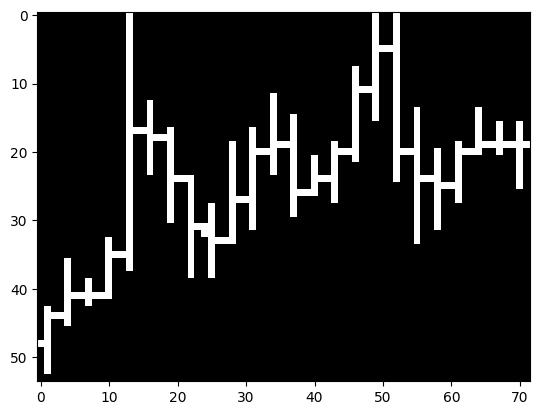

In [126]:
# Display the image
plt.figure()
plt.imshow(processedImg, cmap = "gray")

cv2.imwrite("sample_image.jpeg", processedImg)

In [221]:
img = mpimg.imread("sample_image.jpeg")
print(img.shape)

(48, 40)


In [278]:
processedImg.shape

(54, 72)

In [33]:
# Test whether training_data.dat can read
training_data = []
training_data.append(np.memmap("image_data/dogeusdt/training_data.dat", dtype = np.uint8, mode = 'r').reshape(
                        (-1, 54, 72)))
training_data = np.concatenate(training_data)
print(training_data.shape)

(26241, 54, 72)


In [46]:
image = training_data[1]
image.shape

(54, 72)

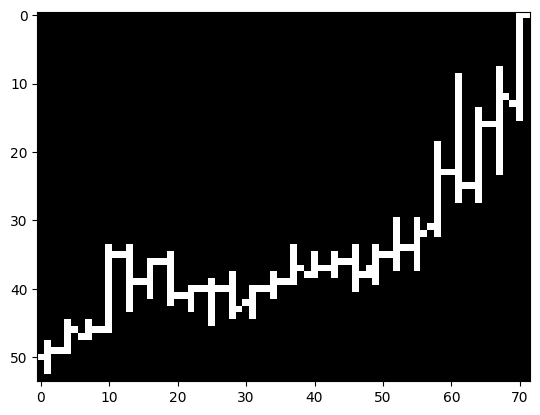

In [47]:
plt.figure()
plt.imshow(image, cmap = "gray")